In [1]:
# 期末作業-使用分類演算法預測鐵達尼號乘客的存活
江逸萱

In [7]:
import pandas as pd

# 讀入資料
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

#描述性統計

In [ ]:
titanic_train.describe() # 發現 Age 有 NaN

#確認變數是否含有遺漏值

In [ ]:
print(titanic_train.isnull().sum())

#填補年齡遺漏值
##我們使用中位數來填補 Age 變數的遺漏值。

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


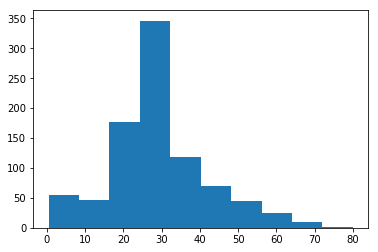

In [8]:
import numpy as np
import matplotlib.pyplot as plt

age_median = np.nanmedian(titanic_train.Age) # 要忽略 NaN
new_Age = np.where(titanic_train.Age.isnull(), age_median, titanic_train.Age)
titanic_train.Age = new_Age
print(titanic_train.describe())

# 看看填補完後的情形
plt.hist(titanic_train.Age)
plt.show()

#填補登船港口遺漏值
##計數最多的港口來填補 Embarked 變數的遺漏值。

In [9]:
print(titanic_train.Embarked.value_counts()) # S 最多
new_Embarked = np.where(titanic_train.Embarked.isnull(), "S", titanic_train.Embarked)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


#Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train.Sex)
encoded_Embarked = label_encoder.fit_transform(new_Embarked)

#建立 X 與 y
##Scikit-learn 完全使用矩陣運算

In [11]:
titanic_X = pd.DataFrame([titanic_train.Pclass,
                          encoded_Sex,
                          new_Age,
                          titanic_train.SibSp,
                          titanic_train.Parch,
                          titanic_train.Fare,
                          encoded_Embarked
]).T

titanic_y = titanic_train.Survived
print(titanic_X.shape)
print(titanic_y.shape)

(891, 7)
(891,)


#切分訓練與測試資料
##利用 70%/30% 這個比例切分訓練與測試資料。

In [12]:
from sklearn.cross_validation import train_test_split

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(titanic_X, titanic_y, test_size = 0.3)

C:\Users\BB\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#建立分類器

In [13]:
from sklearn import metrics, tree

# 建立模型
decison_clf = tree.DecisionTreeClassifier(random_state = 87)
decison_clf.fit(train_X, train_y)

# 預測
test_y_predicted = decison_clf.predict(test_X)

# 準確率
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.764925373134


#應用模型在沒有答案的資料

In [15]:
url = "https://storage.googleapis.com/py_ds_basic/kaggle_titanic_test.csv"
to_submit = pd.read_csv(url)
print(to_submit.shape)
print(to_submit.head())

# 繳交資料有一個觀測值的 Fare 是遺漏值
print(to_submit.isnull().sum())

# 跟訓練資料作一樣的整理
encoded_Sex_to_submit = label_encoder.fit_transform(to_submit.Sex)
encoded_Embarked_to_submit = label_encoder.fit_transform(to_submit.Embarked)
age_median = np.nanmedian(to_submit.Age) # 要忽略 NaN
imputed_Age = np.where(to_submit.Age.isnull(), age_median, to_submit.Age)
fare_median = np.nanmedian(to_submit.Fare) # 要忽略 NaN
imputed_Fare = np.where(to_submit.Fare.isnull(), fare_median, to_submit.Fare)

to_submit_X = pd.DataFrame([to_submit.Pclass,
                            encoded_Sex_to_submit,
                            imputed_Age,
                            to_submit.SibSp,
                            to_submit.Parch,
                            imputed_Fare,
                            encoded_Embarked_to_submit
]).T

# 預測
to_submit_y = decison_clf.predict(to_submit_X)
print(to_submit_y[0:5])

(418, 11)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare           

In [16]:
# 準備要上傳的檔案
to_submit_dict = {
    "PassengerId": to_submit["PassengerId"],
    "Survived": to_submit_y
}
to_submit_df = pd.DataFrame(to_submit_dict)

In [17]:
# 輸出成 csv
to_submit_df.to_csv("to_submit.csv", index = False)